# Assignment Kennis en Data

## Notebook made by


|Naam|Studentnummer|
|-|-|
|Justin|secret|
|Rowan|secret|
|Martijn|secret|
| | |

## Peerreview

* Vul onderstaande dict/tabel in en run de cel. Klopt het? Zijn jullie het er allemaal mee eens?
    * Verander `1,2,3,4` door jullie studentnummers
    * `1: {1:.2,2:.3,3:.3,4:.2}` betekent dat student 1 zijn punt zo over de 4 studenten verdeelt
    * Let op, per student moeten de punten optellen tot 1!
    * De gegeven punten staan in de tabel op de rijen, de ontvangen punten in de kolommen.
    * met `cijfer_per_student` kan je bepalen welk cijfer ieder krijgt bij een gegeven groepscijfer.

## Toelichting

* De meeste opgaven worden automatisch nagekeken. Bij vrijwel alle opdrachten staan er een paar tests onder de opdracht, dit is voornamelijk om te zorgen dat je de juiste type output geeft. Dit zijn dus *NIET* alle tests, die komen er bij het graden nog bij.
* Elke vraag is 1 punt waard, tenzij anders aangegeven. Soms is die punt onderverdeeld in deelpunten, maar niet altijd. 

## Voor het inleveren!

* Pas niet de cellen aan, vooral niet die je niet kunt editen. Dit levert problemen op bij nakijken. Twijfel je of je per ongeluk iets hebt gewijzigd, kopieer dan bij inleveren je antwoorden naar een nieuw bestand, zodat het niet fout kan gaan.

* Zorg dat de code goed runt van boven naar beneden, verifieer dat door boven in Kernel -> Restart & Run All uit te voeren

## Na het inleveren!

* Het gebeurt erg vaak dat mensen een "leeg bestand" inleveren. Vaak een andere versie van de opgave die nog ergens op je computer rondslingerde. Zonde van al je werk toch!
* Dus, lever **minstens een half uur voor tijd in**. Download dan wat je hebt ingeleverd op Canvas. Geef het een andere naam om verwarring te voorkomen. En draai alle cellen, en bekijk het. Geen syntax fouten? Alle vragen gemaakt? Dan zit het vast wel goed, en hoef je niet in de zenuwen te zitten.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#RDF-en-RDFS-completion" data-toc-modified-id="RDF-en-RDFS-completion-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>RDF en RDFS completion</a></span><ul class="toc-item"><li><span><a href="#Jouw-taak" data-toc-modified-id="Jouw-taak-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Jouw taak</a></span><ul class="toc-item"><li><span><a href="#Je-cijfer-is-gebaseerd-op" data-toc-modified-id="Je-cijfer-is-gebaseerd-op-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Je cijfer is gebaseerd op</a></span></li><li><span><a href="#Voorwaarden" data-toc-modified-id="Voorwaarden-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Voorwaarden</a></span><ul class="toc-item"><li><span><a href="#Database-en-regels" data-toc-modified-id="Database-en-regels-1.1.2.1"><span class="toc-item-num">1.1.2.1&nbsp;&nbsp;</span>Database en regels</a></span></li><li><span><a href="#Test-voorbeelden" data-toc-modified-id="Test-voorbeelden-1.1.2.2"><span class="toc-item-num">1.1.2.2&nbsp;&nbsp;</span>Test voorbeelden</a></span></li><li><span><a href="#Check-ajb" data-toc-modified-id="Check-ajb-1.1.2.3"><span class="toc-item-num">1.1.2.3&nbsp;&nbsp;</span>Check ajb</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Jouw-completion-functie" data-toc-modified-id="Jouw-completion-functie-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Jouw completion functie</a></span></li><li><span><a href="#Jouw-lijst-met-testen" data-toc-modified-id="Jouw-lijst-met-testen-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Jouw lijst met testen</a></span></li><li><span><a href="#Voor-de-echte-diehards-die-gaan-voor-een-10" data-toc-modified-id="Voor-de-echte-diehards-die-gaan-voor-een-10-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Voor de echte diehards die gaan voor een 10</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Hoeveel-RDFS-statements-zijn-er-eigenlijk-die-zouden-kunnen-volgen?" data-toc-modified-id="Hoeveel-RDFS-statements-zijn-er-eigenlijk-die-zouden-kunnen-volgen?-4.0.1"><span class="toc-item-num">4.0.1&nbsp;&nbsp;</span>Hoeveel RDFS statements zijn er eigenlijk die zouden kunnen volgen?</a></span></li></ul></li></ul></li></ul></div>

# RDF en RDFS completion

* We maken een programma dat gegeven een RDF triple store plus een set RDFS statements, alle mogelijke niet triviale logische consequenties hiervan afleidt, en die in een RDF en RDFS database zet.
* Dit wordt ook wel *materialization* genoemd. Het idee is dat uit beide kennisbanken **exact dezelfde feiten volgen**, maar dat dat sneller kan vanuit de pure RDF versie (omdat je dan geen feiten hoeft af te leiden).
* De technische term voor het algorithme dat deze "completering" doet is de *chase*.
* Het [artikel van Enrico Franconi et al](https://link.springer.com/chapter/10.1007/978-3-642-41335-3_7) bevat een systeem.
* Net als in Franconi werken we alleen met de 4 interresantste RDFS statements:
    * **Hierarchie** 
        * $\forall xy (Rxy \rightarrow Sxy)$  (" to love him is to know him", als je van iemand houdt dan ken je diegene) 
        * $\forall x (Horse(x) \rightarrow Animal(x))$
    * **Domain en range restrictions**
        * $\forall xy (Rxy \rightarrow Dx)$ (domain) "Als x een staart heeft is het een dier"
        * $\forall xy (Rxy \rightarrow Dy)$ (range)  "Als je een  ouder bent van y, is y een mens."
        
## Jouw taak

1. Maak de functie `complete(facts, rules)` die voldoet aan de volgende eigenschap:
    * voor elke feit `(o,p,s)`, facts+rules $\models$ (o,p,s) $\Leftrightarrow$ `complete(facts, rules)` $\models$ (o,p,s) 
        * Jouw functie is zowel volledig als geldig (*sound and complete*), dat is exact wat je wilt.
    * `complete(facts, rules)` is een verzameling feiten.
2. Maak een flinke collectie van tests waarmee je test dat jouw functie aan die eisen voldoet. 
    * Dus dat het niet te veel en niet te weinig, maar exact de juiste feiten impliceert.
    * Je deelt die tests met alle anderen, en ook jouw functie, en we gaan dus elke functie tegen elke test draaien, en dus een matrix met scores maken.
    
### Je cijfer is gebaseerd op 

1. Hoe goed doorstaat jouw functie alle tests.
2. Hoe goed zijn jouw tests.
    * Strenge (doch rechtvaardige) tests zijn natuurlijk het best. Tests waar iedereen voor slaagt lijken leuk maar zijn meestal niet veel waard. 
    
    
### Voorwaarden

#### Database en regels

We werken niet direct met RDF en RDFS omdat dat zo'n enorme syntax overhead heeft. We doen de dingen gewoon lekker in Python.

* Je RDF store is een verzameling triples, waarbij de 3 elementen strings of integers of floats zijn.
    * Je schrijft eigenschappen van individuen als `('henk', 'isa', 'Man')`
        * dus altijd met de vaste relatie `isa` in het midden.
    * en relaties tussen individuen als `('henk', Houdt_van', 'ingrid')`
    * en idem voor relaties tussen individuen en getallen `('henk', 'leeftijd', 53)`
    * Begin namen van individuen ("knopen") meteen kleine letter, en eigenschappen en relaties met een grote.
* Je RDFS store is een dict met sleutels `['subPropertyOf', 'subClassOf', 'domain', 'range']` en voor elke sleutel een verzameling met 2-tuples (paartjes in gewoon Nederlands) als waarde. 

#### Test voorbeelden

Een testset is een lijst triples van de vorm `(D:RDF_store, R:RDFS_store, Pos:RDF_store, Neg:RDF_store)` waarvoor geldt dat 
* voor elk triple t in Pos: $D,R\models t$
* voor elk triple t in Neg: $D,R\not\models t$
* Met $\models$ wordt dus bedoeld volgens de Franconi semantiek, en dus ook volgens de RDF semantiek. Dat betekent dus niet per se dat dit hetzelfde is als volgens jouw completion functie (want die zou fouten kunnen maken).
* Hieronder staat een flauw voorbeeld. Jounes is veel gaver en strenger en leuker  natuurlijk!

#### Check ajb

* Als de tests hieronder niet slagen kunnen we niks met je code, en kan je  dus niet meedoen. Zonde van al je werk toch?

In [2]:
# voorbeeld
RDFS= {'subPropertyOf': {('Houdt_van','Kent'), ('Eet','Vindt_lekker')},
      'subClassOf': {('Mens','Dier'),('Student','Mens')},
      'domain': {('Houdt_van','Mens')},
      'range': ('Vindt_lekker,Eten')}

In [3]:
# voorbeeld

test1= [
    ({('Henk','isa','Mens')},  # RDF store
       {'subPropertyOf': set(),  # RDFS store
      'subClassOf': set(),
      'domain': set(),
      'range':  set()},
       {('Henk','isa','Sterfelijk')}, # positieve voorbeelden
       {('henk', 'Houdt_van', 'ingrid')} # negatieve voorbeelden
       )
       ]

# Jouw completion functie

In [4]:
def complete_12522503(facts, rules):
    new_facts = list(facts.copy())

    subClassOf = list(rules['subClassOf'])
    subPropertyOf = list(rules['subPropertyOf'])
    Domain = list(rules['domain'])
    Range = list(rules['range'])

    # extend subclasses
    # (A, sc, B) & (B, sc, C) -> (A, sc, C)
    for sCO_1 in subClassOf:
      for sCO_2 in subClassOf:
        if sCO_1[1] == sCO_2[0]:
          subClassOf.append((sCO_1[0], sCO_2[1]))

    # extend subproperties
    # (A, sp, B) & (B, sp, C) -> (A, sp, C)
    for sPO_1 in subPropertyOf:
      for sPO_2 in subPropertyOf:
        if sPO_1[1] == sPO_2[0]:
          subPropertyOf.append((sPO_1[0], sPO_2[1]))

    # extend Domain & Range by implied Subproperties
    for sPO in subPropertyOf:
      for D in Domain:
        if D[0] == sPO[1]:
          Domain.append((sPO[0], D[1]))
      for R in Range:
        if R[0] == sPO[1]:
          Range.append((sPO[0], R[1]))

    # extend Domain & Range by implied subClasses
    for sCO in subClassOf:
      for D in Domain:
        if D[1] == sCO[0]:
          Domain.append((D[0], sCO[1]))
      for R in Range:
        if R[1] == sCO[0]:
          Range.append((R[0], sCO[1]))

    # iterate over all new facts
    for fact in new_facts:
        s = fact[0]
        p = fact[1]
        o = fact[2]

        # add all SubClasses
        for item in subClassOf:
            if p == 'isa' and o == item[0]:
              new_fact = (s, p, item[1])
              if new_fact not in new_facts:
                new_facts.append(new_fact)

        # add all SubProperties
        # for all a,b (subProperty, a, b) -> for all x,y (x,a,y) -> (x,b,y)
        for item in subPropertyOf:
            if item[0] == p:
                # new_facts.append((s, item[1], o))
                new_fact = (s, item[1], o)
                if new_fact not in new_facts:
                  new_facts.append(new_fact)


        # for all a,d (domain, a, d) -> for all x,y (x,a,y) -> (x, type, c)
        for D in Domain:
            if D[0] == fact[1]:
                # new_facts.append((s, 'isa', D[1]))
                new_fact = (s, 'isa', D[1])
                if new_fact not in new_facts and s != D[1]:
                  new_facts.append(new_fact)

        # for all a,c (range, a, c) -> for all x,y (x,a,y) -> (y, type, d)
        for R in Range:
            if R[0] == fact[1]:
                # new_facts.append((o, 'isa', R[1]))
                new_fact = (o, 'isa', R[1])
                if new_fact not in new_facts and o != R[1]:
                  new_facts.append(new_fact)

    return set(new_facts)

RDFS= {'subPropertyOf': {('Houdt_van','Kent'), ('Eet','Vindt_lekker')},
      'subClassOf': {('Mens','Dier'),('Henk','Dier')},
      'domain': {('isa','Mens')},
      'range': {('isa', 'Dier')}}
RDF= {('Henk','isa','Mens')}
completion= complete_12522503(RDF,RDFS)
print(completion)
# geeft Henk isa Dier, maar niet Henk isa Student

print(complete_12522503(test1[0][0],test1[0][1]))

{('Mens', 'isa', 'Dier'), ('Henk', 'isa', 'Dier'), ('Henk', 'isa', 'Mens')}
{('Henk', 'isa', 'Mens')}


In [5]:
# assert studnr!= 1234567, 'Dit is niet jouw student nummer!'

In [6]:
RDFS= {'subPropertyOf': {('Houdt_van','Kent'), ('Eet','Vindt_lekker')},
      'subClassOf': {('Mens','Dier'),('Student','Mens')},
      'domain': {('Houdt_van','Mens')},
      'range': {('Vindt_lekker','Eten')}}
RDF= {('Henk','isa','Mens')}
completion= complete_12522503(RDF,RDFS)
assert isinstance(completion,set)
for t in completion:
    assert isinstance(t,tuple)
    assert len(t)==3
    assert isinstance(t[0], str)
    assert isinstance(t[1], str)
    assert isinstance(t[2], (str,int,float))
    

# Jouw lijst met testen

In [7]:
#testnaam= 'test_'+str(studnr)

# jouw test

test_12522503=[
    ({('Netherlands','isa','country'), ('Amsterdam','isa','capital'),
       ('Belgium','isa','country'), ('Netherlands','neighbours','Belgium'),
       ('Netherlands','hascapital','Amsterdam'), ('Amsterdam','hasmayor','FemkeHalsema'),
       (('Amsterdam','haspopulation',872.922))},  # RDF store
     {'subPropertyOf': {('isin','hascapital')},  # RDFS store
      'subClassOf': {('capital','city'), ('Netherlands','country')},
      'domain': {('neighbours','country'), ('isin','city'), ('hascapital','country'), ('hasmayor','city')},
      'range': {('neighbours','country'), ('isin','country'), ('hascapital','capital'), ('hasmayor','mens')}},
       {('Amsterdam','isa','city'), ('Amsterdam', 'haspopulation', 872.922)}, # positieve voorbeelden
       {('Amsterdam','neighbours','country')} # negatieve voorbeelden
       ),

       ({('dirk', 'isa', 'Man'), ('clara', 'isa', 'Vrouw'), ('dirk', 'Houdt_van', 'clara')},  # RDF store
     {'subPropertyOf': {('Houdt_van', 'Kent')},  # RDFS store
      'subClassOf': {('Man', 'Mens'), ('Vrouw', 'Mens')},
      'domain': {},
      'range': {}},
       {('dirk', 'Kent', 'clara'), ('clara', 'isa', 'Mens'), ('dirk', 'isa', 'Mens'), 
        ('dirk', 'Houdt_van', 'clara')}, # positieve voorbeelden
       {('clara', 'Houdt_van', 'dirk'), ('clara', 'Kent', 'dirk')} # negatieve voorbeelden
       ),
    
    ({('dirk', 'isa', 'Man'), ('clara', 'isa', 'Vrouw'), ('dirk', 'Houdt_van', 'clara')},  # RDF store
     {'subPropertyOf': {('Houdt_van', 'Kent')},  # RDFS store
      'subClassOf': {('Man', 'Mens'), ('Vrouw', 'Mens'), ('Person', 'Mens')},
      'domain': {('isa', 'Person')},
      'range': {('isa', 'Someone')}},
       {('Man', 'isa', 'Person'), ('clara', 'isa', 'Mens'), ('Person', 'isa', 'Someone')}, # positieve voorbeelden
       {('clara', 'isa', 'Mens'), ('clara', 'Kent', 'dirk')} # negatieve voorbeelden
        ),
    
    ({('dirk', 'isa', 'Man'), ('clara', 'isa', 'Vrouw'), ('dirk', 'Houdt_van', 'clara')},  # RDF store
     {'subPropertyOf': {('Houdt_van', 'Kent')},  # RDFS store
      'subClassOf': {('Man', 'Mens'), ('Vrouw', 'Mens'), ('dirk', 'Naam'), ('clara', 'Naam')},
      'domain': {('isa', 'Naam')},
      'range': {('isa', 'Mens')}},
       {('Vrouw', 'isa', 'Mens'), ('clara', 'isa', 'Naam'), ('dirk', 'isa', 'Man')}, # positieve voorbeelden
       {('Naam', 'isa', 'dirk'), ('Naam', 'Kent', 'clara')} # negatieve voorbeelden
        ),

    ({('henk', 'isa', 'Driver'), ('audi', 'isa', 'Car'), ('henk', 'DrivesA', 'Car'), ('henk', 'isa', 'Adult')},  # RDF store
     {'subPropertyOf': {('DrivesA', 'OwnsA'), ('OwnsA', 'HasBoughtA')},  # RDFS store
      'subClassOf': {('henk', 'Person'), ('Car', 'Vehicle'), ('Adult', 'Human')},
      'domain': {('DrivesA', 'Human'), ('DrivesA', 'Adult')},
      'range': {('HasBoughtA', 'Object')}},
       {('henk', 'HasBoughtA', 'Car'), ('henk', 'isa', 'Driver'), ('henk', 'DrivesA', 'Car'), ('henk', 'isa', 'Adult'), 
        ('henk', 'OwnsA', 'Car'), ('audi', 'isa', 'Vehicle'), ('Car', 'isa', 'Object')}, # positieve voorbeelden
       {('henk', 'isa', 'Object'), ('henk', 'HasBoughtA', 'Adult')} # negatieve voorbeelden
    )
       ]


for test in test_12522503:
  print(complete_12522503(test[0], test[1]))
  # print(len(complete_12522503(test[0], test[1])))

{('FemkeHalsema', 'isa', 'mens'), ('Amsterdam', 'haspopulation', 872.922), ('Amsterdam', 'isa', 'city'), ('Amsterdam', 'hasmayor', 'FemkeHalsema'), ('Netherlands', 'neighbours', 'Belgium'), ('Netherlands', 'isa', 'country'), ('Netherlands', 'hascapital', 'Amsterdam'), ('Belgium', 'isa', 'country'), ('Amsterdam', 'isa', 'capital')}
{('dirk', 'isa', 'Man'), ('clara', 'isa', 'Mens'), ('dirk', 'isa', 'Mens'), ('dirk', 'Kent', 'clara'), ('dirk', 'Houdt_van', 'clara'), ('clara', 'isa', 'Vrouw')}
{('Person', 'isa', 'Mens'), ('Mens', 'isa', 'Someone'), ('clara', 'isa', 'Person'), ('Vrouw', 'isa', 'Person'), ('Mens', 'isa', 'Mens'), ('Vrouw', 'isa', 'Mens'), ('clara', 'isa', 'Mens'), ('dirk', 'Kent', 'clara'), ('dirk', 'Houdt_van', 'clara'), ('Mens', 'isa', 'Person'), ('Person', 'isa', 'Someone'), ('Man', 'isa', 'Mens'), ('clara', 'isa', 'Vrouw'), ('dirk', 'isa', 'Person'), ('Vrouw', 'isa', 'Someone'), ('Man', 'isa', 'Someone'), ('dirk', 'isa', 'Man'), ('dirk', 'isa', 'Mens'), ('Man', 'isa', 'P

In [8]:
assert isinstance(test_12522503,list)
for test in test_12522503:
    assert isinstance(test,tuple)
    assert len(test)==4
    assert isinstance(test[0],set)
    assert isinstance(test[1],dict)
    assert isinstance(test[2],set)
    assert isinstance(test[3],set)

# Voor de echte diehards die gaan voor een 10

Franconi beschrijft in zijn artikel dat je ook RDFS statements uit andere RDFS statements kunt afleiden. Hij geeft een leuk voorbeeld in het eerste plaatje.

Dat kan jij natuurlijk ook!

Maak een functie `complete(RDFS)` die precies alle RDFS statements afleidt die volgen uit de verzameling `RDFS`.

Maak er ook weer een mooie testset bij, en beargumenteer dat jouw systeem geldig en volledig is.

In [9]:
RDFS = {'subPropertyOf': {('hascapital','isin'), ('isin','isa')}, # RDFS store
      'subClassOf': {('capital','city')},
      'domain': {('neighbours','country'), ('isin','city'), ('hascapital','country')},
      'range': {('neighbours','country'), ('isin','country'), ('hascapital','capital')}}

{'subPropertyOf': {('B', 'D'), ('A', 'B'), ('A', 'D'), ('B', 'C'), ('C', 'D'), ('A', 'C')}, 'subClassOf': {('D', 'E'), ('D', 'F'), ('E', 'F')}, 'domain': {('Letter', 'D'), ('Letter', 'C'), ('Letter', 'B')}, 'range': set()}


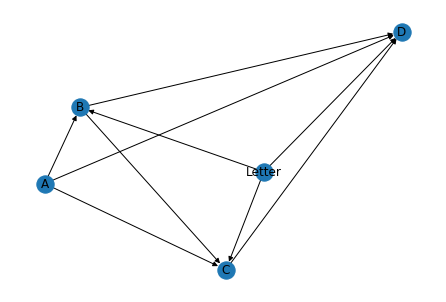

In [10]:
RDFS = {'subPropertyOf': { ("B", "C"), ('C', 'D'), ('A', 'B')},  # RDFS store
      'subClassOf': {('D', 'E'), ("E", "F")},
      'domain': {('Letter','B')},
      'range': {}}


def complete(RDFS):
    import networkx as nx

    subClasses = nx.DiGraph()
    subProperties = nx.DiGraph()
 
    for D in RDFS['domain']:
        subClasses.add_edge(D[0], D[1], soort='Domain')
        subProperties.add_edge(D[0], D[1], soort='Domain')
        
    for R in RDFS['range']:
        subProperties.add_edge(R[0], R[1], soort='Range')
        subClasses.add_edge(R[0], R[1], soort='Range')
    
    for sC in RDFS['subClassOf']:
        subClasses.add_edge(sC[0], sC[1], soort='SC')
        
    for sP in RDFS['subPropertyOf']:
        subProperties.add_edge(sP[0], sP[1], soort='SP')
        


    i = True
    while i:
        count = len(list(subClasses.edges()))+len(list(subProperties.edges()))

        for rule in RDFS['subPropertyOf']:
            A = rule[0]
            B = rule[1]
            for node in list(subProperties.nodes()):
                if subProperties.has_edge(B, node) and nx.get_edge_attributes(subProperties, 'soort')[B, node] == 'SP':
                    subProperties.add_edge(A, node, soort='SP')

        for rule in RDFS['subClassOf']:
            A = rule[0]
            B = rule[1]
            for node in list(subClasses.nodes()):
                if subClasses.has_edge(B, node) and nx.get_edge_attributes(subClasses, 'soort')[B, node] == 'SC':
                    subClasses.add_edge(A, node, soort='SC')

        # Domain    
        # A sp B, B dom C -> A dom C || A dom B, B sc C -> A dom C
        for rule in RDFS['domain']:
            B = rule[0]
            C = rule[1]
            for node in list(subProperties.nodes()):
                if subProperties.has_edge(C, node) and nx.get_edge_attributes(subProperties, 'soort')[C, node] == 'SP':
                    subProperties.add_edge(B, node, soort='Domain')
            
            for node in list(subClasses.nodes()):
                if subClasses.has_edge(C, node) and nx.get_edge_attributes(subClasses, 'soort')[C, node] == 'SC':
                    subClasses.add_edge(B, node, soort='Domain')
        
        
        # Range
        # A sp B, B ran C -> A ran C || A ran B, B sc C -> A ran C
        for rule in RDFS['range']:
            B = rule[0]
            C = rule[1]
            for node in list(subProperties.nodes()):
                if subProperties.has_edge(C, node) and nx.get_edge_attributes(subProperties, 'soort')[C, node] == 'SP':
                    subProperties.add_edge(B, node, soort='Range')
            
            for node in list(subClasses.nodes()):
                if subClasses.has_edge(C, node) and nx.get_edge_attributes(subClasses, 'soort')[C, node] == 'SC':
                    subClasses.add_edge(B, node, soort='Range')

        if (len(list(subProperties.edges())) + len(list(subClasses.edges())) ) == count:
            i = False
    
    SP, SC, Domain, Range = [[],[],[],[]]
    for edge in list(subClasses.edges(data=True)):
        if edge[2]['soort'] == 'SC':
            SC.append((edge[0], edge[1]))
        elif edge[2]['soort'] == 'Domain':
            Domain.append((edge[0], edge[1]))
        elif edge[2]['soort'] == 'Range':
            Range.append((edge[0], edge[1]))
            
    for edge in list(subProperties.edges(data=True)):
        if edge[2]['soort'] == 'SP':
            SP.append((edge[0], edge[1]))
        elif edge[2]['soort'] == 'Domain':
            Domain.append((edge[0], edge[1]))
        elif edge[2]['soort'] == 'Range':
            Range.append((edge[0], edge[1]))
   
    result = {'subPropertyOf':set(SP),
      'subClassOf': set(SC),
      'domain': set(Domain),
      'range': set(Range)}
    
    nx.draw(subProperties, with_labels=True)
   
    return result
     
completion= complete(RDFS)
print(completion)

### Hoeveel RDFS statements zijn er eigenlijk die zouden kunnen volgen?

* Gegeven de relaties en eigenschappen in de verzameling `RDFS` is dit eindig.
* En er zijn maar 4 soorten RDFS statements. 
* Dus moet het wel eindig zijn, en kan je zelfs uitrekenen hoeveel.
* Een manier is om ze allemaal te proberen....
    * Voeg het antecedent toe als RDF-triple aan `RDFS` en kijk of het consequent dan volgt...
* Reken het eens uit voor $r$ relaties en $p$ eigenschappen.
    * Met $r$ relaties kan je $r\cdot(r-1)$ veel `subPropertyOf` relaties maken toch...
    * en dan nog ....
    * en ....
* Dit is niet eens zo gek, maar met een *chase* gaat het natuurlijk veel sneller omdat je dan resultaatgericht werkt in plaats van als een dolle alles gaat proberen.
    * Bijv; Stel je hebt 100 relaties, maar in je RDFS komt er maar 1 voor in antecdent positie in `subPropertyOf` statements. Hoeveel `subPropertyOf` kan je dan afleiden? Ja, dat is dus sneller dan al die 100*99 te gaan proberen toch? Want dat is best veel.


In [11]:
# Als het mogelijk is dat subProperty relaties een cirkel vormen
r= len(RDFS['subPropertyOf'])
Aantal_mogelijke_RDFS_van_subPropertyOf = r*(r-1)

# Als het mogelijk is dat subClass relaties een cirkel vormen
p= len(RDFS['subClassOf'])
Aantal_mogelijke_RDFS_van_subClassOf = p*(p-1)

Aantal_mogelijke_RDFS = Aantal_mogelijke_RDFS_van_subPropertyOf + Aantal_mogelijke_RDFS_van_subClassOf

# Dit is wat maximaal mogelijk zou zijn als de domain en range er verder geen restricties op leggen
Aantal_mogelijke_RDFS

8